In [22]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

![](Images/june_bill.jpg)

## What is the billboard hot 100?:
    The Billboard Hot 100 is the music industry standard record chart in the United States for songs, published weekly by Billboard magazine. 
    Chart rankings are based on sales (physical and digital), radio play, and online streaming in the United States.
    
    fun fact:
        The first number one song of the Billboard Hot 100 was "Poor Little Fool" by Ricky Nelson, and the chart's current number-one song is "Butter" by BTS.

In [2]:
# To find path for dataset
%pwd

'/Users/gmac/Desktop/billboard-the-hot-100-songs'

In [3]:
filepath = './Data/'

df = pd.read_csv(filepath + 'charts.csv')

In [4]:
df.head(5)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-06-12,1,Butter,BTS,1.0,1,2
1,2021-06-12,2,Good 4 U,Olivia Rodrigo,2.0,1,3
2,2021-06-12,3,Levitating,Dua Lipa Featuring DaBaby,4.0,2,35
3,2021-06-12,4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),5.0,1,13
4,2021-06-12,5,Save Your Tears,The Weeknd & Ariana Grande,7.0,1,25


In [5]:
df = df.rename(columns={"peak-rank": "peak", "weeks-on-board": "weeksonboard"})

In [6]:
# checking to see if there are any null values
df.isnull().sum()

date                0
rank                0
song                0
artist              0
last-week       31971
peak                0
weeksonboard        0
dtype: int64

In [7]:
df.describe()

,rank,last-week,peak,weeksonboard
count,327987.000000,296016.000000,327987.000000,327987.000000
mean,50.500934,47.605393,41.017424,9.148991
std,28.866094,28.057357,29.350243,7.586790
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,23.000000,14.000000,4.000000
50%,51.000000,47.000000,38.000000,7.000000
75%,76.000000,72.000000,66.000000,13.000000
max,100.000000,100.000000,100.000000,87.000000


### Finding which song has had the max/min amount of weeks on the billboard

In [8]:
print(sqldf("SELECT artist, song, date, MAX(weeksonboard) from df ;", globals()))

            artist         song        date  MAX(weeksonboard)
0  Imagine Dragons  Radioactive  2014-05-10                 87


In [9]:
print(sqldf("SELECT artist, song, date, MIN(weeksonboard) from df ;", globals()))

                                  artist    song        date  \
0  Eminem Featuring Jack Harlow & Cordae  Killer  2021-06-12   

   MIN(weeksonboard)  
0                  1  


## Drake songs that were just 1 spot shy of being in the number 1 spot

In [10]:
print(sqldf("SELECT * from df WHERE peak = '2' AND artist = 'Drake' ;", globals()))

          date  rank             song artist  last-week  peak  weeksonboard
0   2018-12-08    46          Nonstop  Drake       32.0     2            22
1   2018-12-01    32          Nonstop  Drake       33.0     2            21
2   2018-11-24    33          Nonstop  Drake       28.0     2            20
3   2018-11-17    28          Nonstop  Drake       25.0     2            19
4   2018-11-10    25          Nonstop  Drake       22.0     2            18
..         ...   ...              ...    ...        ...   ...           ...
59  2009-08-22     3  Best I Ever Had  Drake        2.0     2            14
60  2009-08-15     2  Best I Ever Had  Drake        2.0     2            13
61  2009-08-08     2  Best I Ever Had  Drake        2.0     2            12
62  2009-08-01     2  Best I Ever Had  Drake        2.0     2            11
63  2009-07-25     2  Best I Ever Had  Drake        3.0     2            10

[64 rows x 7 columns]


In [11]:
df[df['rank'] == 1].value_counts().sum()

3224

### Which artist have the most number 1 slot appearances

In [10]:
number_one = pd.DataFrame(df[df['rank']==1]['artist'].value_counts())
number_one.head(15)

,artist
Mariah Carey,65
The Beatles,54
Boyz II Men,34
Madonna,32
Whitney Houston,31
Drake,31
Michael Jackson,30
The Black Eyed Peas,28
Bee Gees,27
Adele,24


## WordCloud for most common song titles

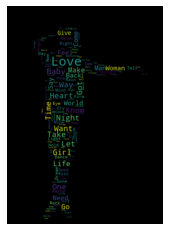

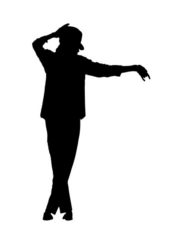

In [53]:
text = ' '.join(df['song'])
stopwords = STOPWORDS
mask = np.array(Image.open('Images/mj2.jpg'))
wc = WordCloud(
    background_color = 'black',
    stopwords = stopwords,
    height = 1200,
    width = 1200,
    mask = mask
)
wc.generate(text)
wc.to_file('Images/wordcloud_output.png')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

## Data Analysis on Michael Jackson

![](Images/MJ.jpg)

In [11]:
df[df['artist']=='Michael Jackson'].head(5) 

,date,rank,song,artist,last-week,peak,weeksonboard
3047,2020-11-14,48,Thriller,Michael Jackson,NaN,4,20
8343,2019-11-09,44,Thriller,Michael Jackson,NaN,4,19
13530,2018-11-10,31,Thriller,Michael Jackson,NaN,4,18
29044,2015-11-21,45,Thriller,Michael Jackson,NaN,4,17
34334,2014-11-15,35,Thriller,Michael Jackson,NaN,4,16


In [12]:
# Finding the number of times Michael Jackson the were number one the longest
df[(df['artist']=='Michael Jackson') & (df['rank']==1)]['song'].value_counts()

Black Or White                    7
Billie Jean                       7
Rock With You                     4
Beat It                           3
Man In The Mirror                 2
Bad                               2
Don't Stop 'til You Get Enough    1
Ben                               1
The Way You Make Me Feel          1
You Are Not Alone                 1
Dirty Diana                       1
Name: song, dtype: int64

<AxesSubplot:xlabel='count', ylabel='song'>

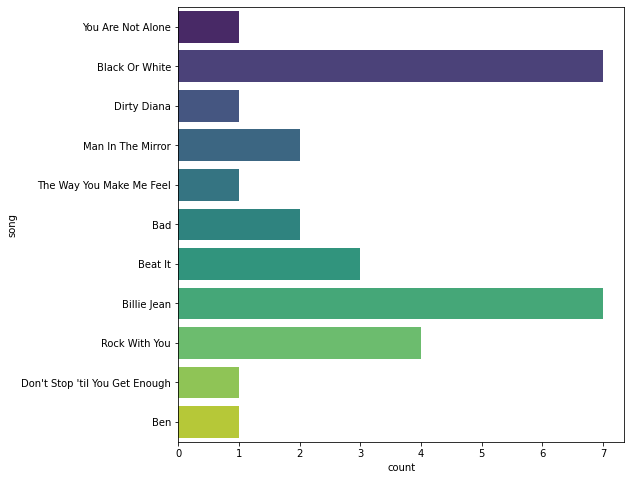

In [52]:
plt.figure(figsize=(8,8))
sns.countplot(y= df[(df['artist']=='Michael Jackson') & (df['rank']==1)]['song'],data=df, palette='viridis')